**กระบวนวิชา 204426 เทอม 1/67**

# **โครงงานการสร้างภาพ Visualization**

1. ให้สร้างภาพเพียง 1 ภาพเท่านั้น โดยใช้เทคนิคต่างๆ ด้าน Data Visualization ซึ่งอาจร่วมใช้เทคนิคด้าน Data Engineering ในเรื่องต่างๆ เช่น Data Transform, Data Cleaning, Data Extraction

2. ให้ระบุสิ่ง (หรือ Feature หรือ Column หรือความสัมพันธ์) ที่เกี่ยวข้อง ที่ถูกนำเสนอในภาพนั้น ให้ชัดเจน อย่างน้อย 5 สิ่ง (ให้คะแนนตามจำนวน และมีคะแนนโบนัส 2% สำหรับแต่ละ Feature ที่เกินกว่า 5 Feature)

3. ข้อมูลนำเข้า เลือกใช้ได้จาก https://opendatascience.com/12-excellent-datasets-for-data-visualization-in-2022/ เท่านั้น

4. ตัวอย่างภาพเพิ่มเติมจากภาพในสไลด์ ดูได้ที่ https://www.tableau.com/learn/articles/best-beautiful-data-visualization-examples



**กำหนดการส่งงาน วันอังคารที่ 8 ตุลาคม 2567**

1) ในเอกสารรูปเล่ม แสดง

- ชื่อ นามสกุล รหัสนักศึกษา

- ชื่อไฟล์ข้อมูลที่ใช้ (และ URL)

- ระบุสิ่ง (หรือ Feature หรือ Column) ที่เกี่ยวข้อง ที่ถูกนำเสนอในภาพ

- ภาพแสดง Visualization 1 ภาพ

- code

- อื่นๆ (ถ้ามี)

2) เอกสารรูปเล่ม ตั้งชื่อว่า project_ID.docx โดยแทนที่ ID ด้วยรหัสนักศึกษา

3) ส่งงานทาง Mango

4) คะแนนของโครงงานเดี่ยวชิ้นนี้มีนำ้หนัก 10% ของเกรด

### 1. Data Extraction
* Download and read the datasets from Twitter Edge Nodes

1. edges.csv - this is the friendship/followership network among the bloggers. The friends/followers are represented using edges. Edges are directed.
2. nodes.csv - it's the file of all the users. This file works
as a dictionary of all the users in this data set. It's useful for fast reference. It contains
all the node ids used in the dataset

Here is an example for edges.

1,2

This means user with id "1" is followering user with id "2".


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
edges = pd.read_csv('/content/drive/MyDrive/Data Engineering/edges.csv')
nodes = pd.read_csv('/content/drive/MyDrive/Data Engineering/nodes.csv')

* Check the structure of both datasets to understand their contents and how they relate to each other

In [4]:
edges.head()

,1,11553
0,1,8762940
1,1,8762941
2,1,688136
3,1,8762942
4,3,718952


In [5]:
print(nodes.head())

   1
0  2
1  3
2  4
3  5
4  6


In [6]:
edges.shape

(85331844, 2)

In [7]:
nodes.shape

(11316810, 1)

* Look for missing values, duplicates, and potential data issues

In [8]:
edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85331844 entries, 0 to 85331843
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   1       int64
 1   11553   int64
dtypes: int64(2)
memory usage: 1.3 GB


In [9]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11316810 entries, 0 to 11316809
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   1       int64
dtypes: int64(1)
memory usage: 86.3 MB


### 2. Data Cleaning
* Check for Missing Values

In [10]:
edges.isnull().sum()

,0
1,0
11553,0


In [11]:
nodes.isnull().sum()

,0
1,0


* Check for Duplicated Values

In [12]:
edges.duplicated().sum()

0

In [13]:
nodes.duplicated().sum()

0

### 3. Data Transformation
* Rename the Columns for Clarity

> edges: แสดงความสัมพันธ์ระหว่างบล็อกเกอร์ซึ่งเป็นผู้ติดตาม (follower) กับบล็อกเกอร์ซึ่งเป็นผู้ที่ถูกติดตาม (followee)

> nodes: เป็น dictionary ที่บันทึก user_id เอาไว้เพื่อใช้ในการอ้างอิงถึง โดยจะประกอบด้วย node ids ทั้งหมดที่ใช้ในชุดข้อมูลนี้

In [14]:
edges.columns = ['follower', 'followee']
nodes.columns = ['user_id']

* Join or merge the edges and nodes data (Optional)

### 4. Visualization
* Use networkx and plot a sample of the network. Directed edges will show the direction of followership.

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

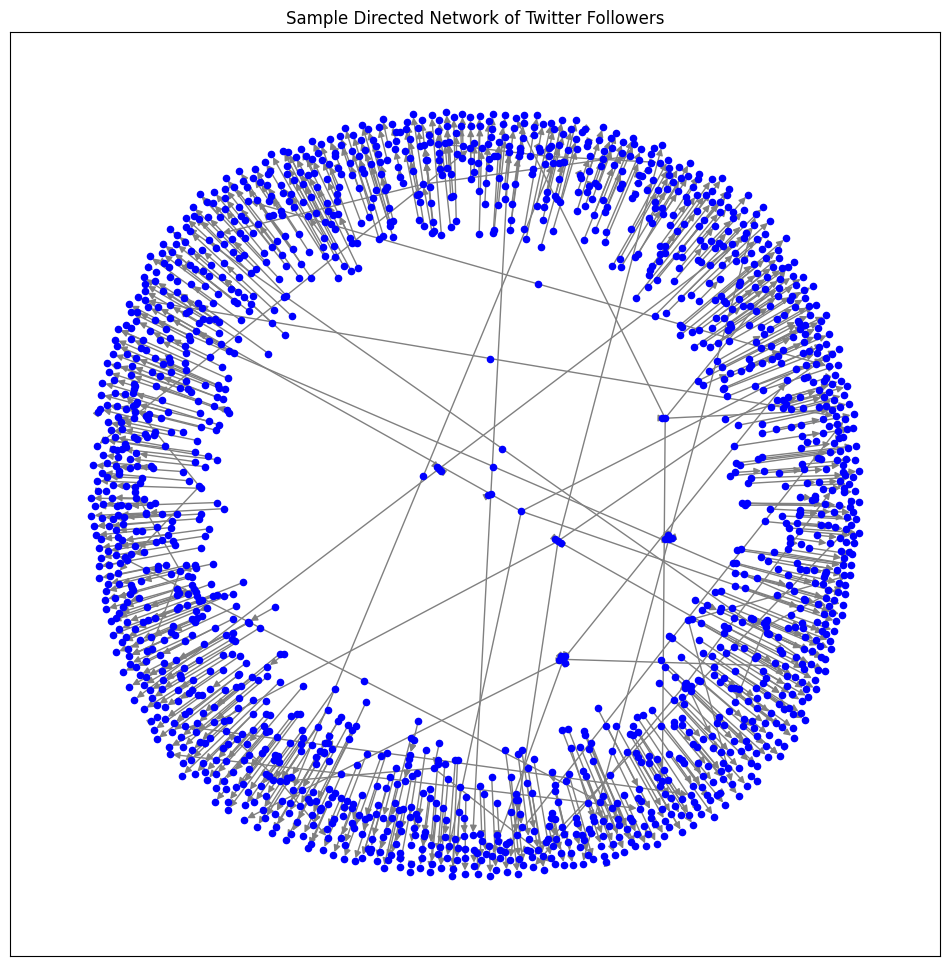

In [16]:
# ทำการสุ่มเส้นเชื่อมโนด (edges) 1000 เส้น
sample_edges = edges.sample(1000, random_state=42)

# สร้าง Directed Graph จากการสุ่มเส้นเชื่อมโนด (edges)
G = nx.from_pandas_edgelist(sample_edges, 'follower', 'followee', create_using=nx.DiGraph())

# แสดง Directed Graph
plt.figure(figsize=(12, 12))
nx.draw_networkx(G, with_labels=False, node_size=20, node_color='blue', edge_color='gray', arrows=True)
plt.title('Sample Directed Network of Twitter Followers')
plt.show()

**Enhacement - take this visualization further**

1. Highlight Important Nodes (e.g., users with the most followers):

  * Use node size or color to represent the number of followers a user has.

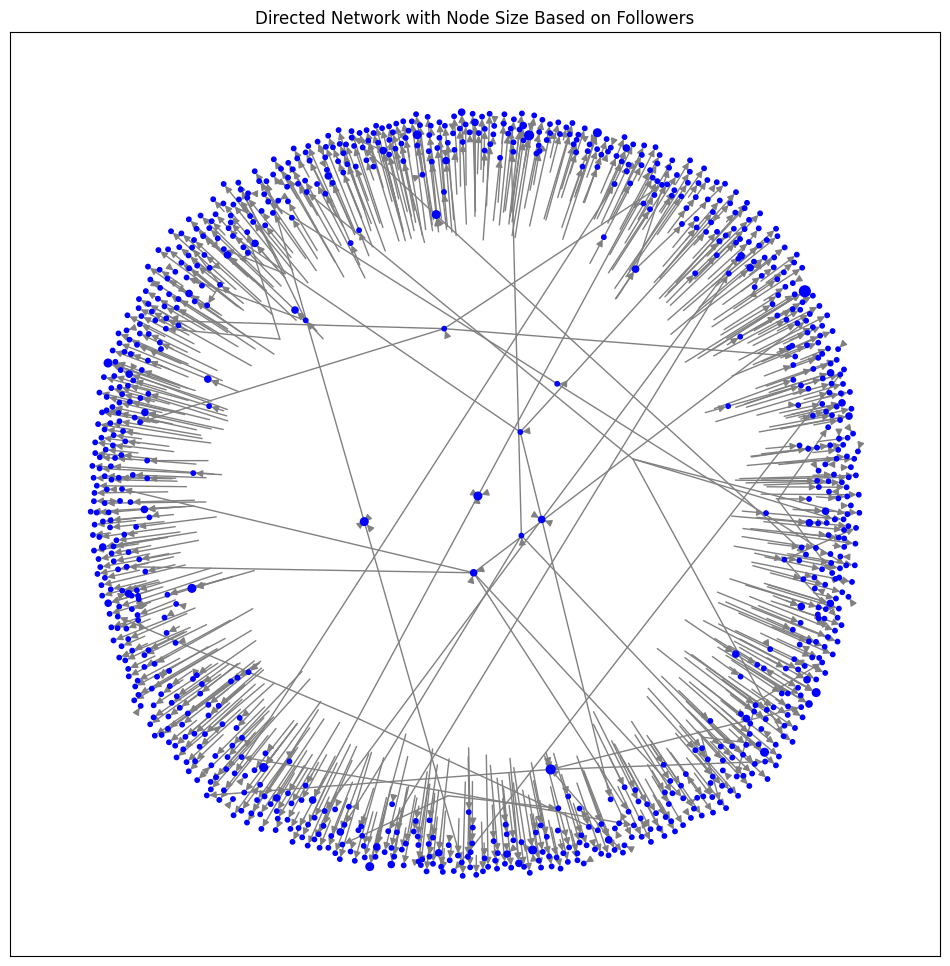

In [22]:
in_degrees = dict(G.in_degree())  # Get in-degree (number of followers) for each node
node_size = [in_degrees[node] * 10 for node in G.nodes()]  # Scale node size by number of followers

plt.figure(figsize=(12, 12))
nx.draw_networkx(G, with_labels=False, node_size=node_size, node_color='blue', edge_color='gray', arrows=True)
plt.title('Directed Network with Node Size Based on Followers')
plt.show()

2. Use Different Layouts:

  * You can change the layout to a more organic or structured design (e.g., spring_layout or kamada_kawai_layout).

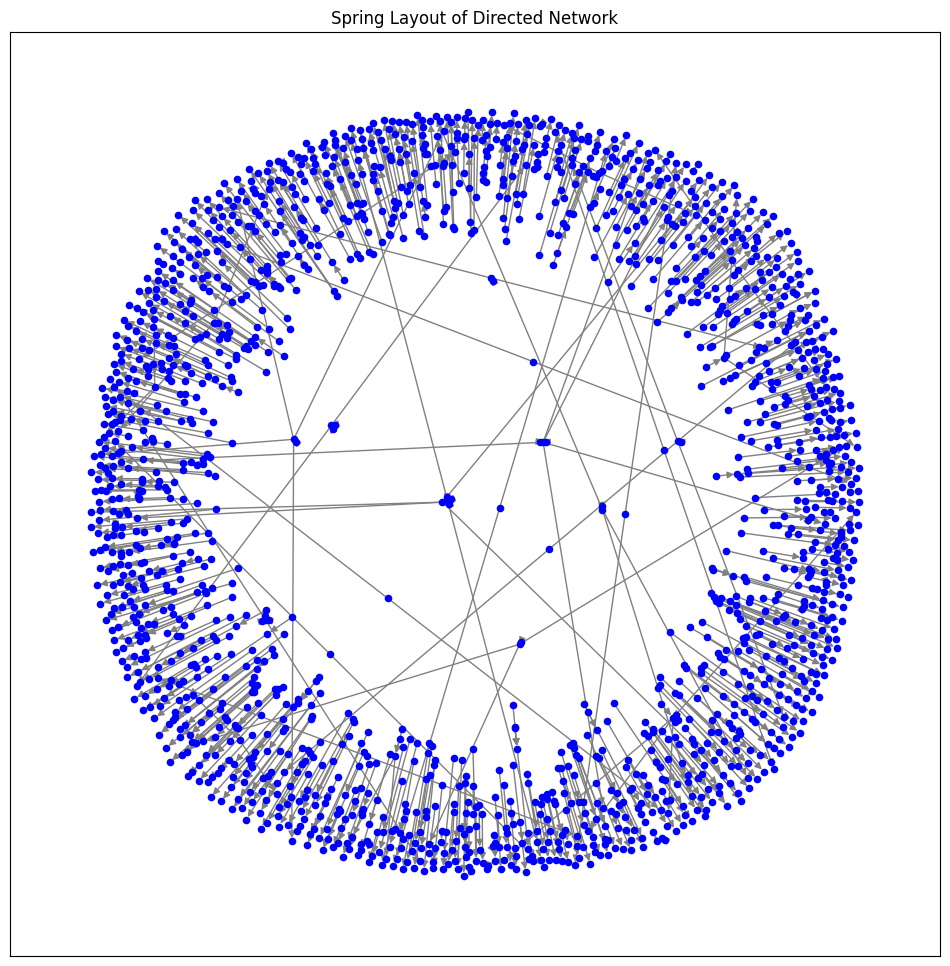

In [23]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Change layout to spring
nx.draw_networkx(G, pos, with_labels=False, node_size=20, node_color='blue', edge_color='gray', arrows=True)
plt.title('Spring Layout of Directed Network')
plt.show()

3. Color Nodes by Clusters or Communities:

  * You can use community detection algorithms to color different groups of closely connected users.

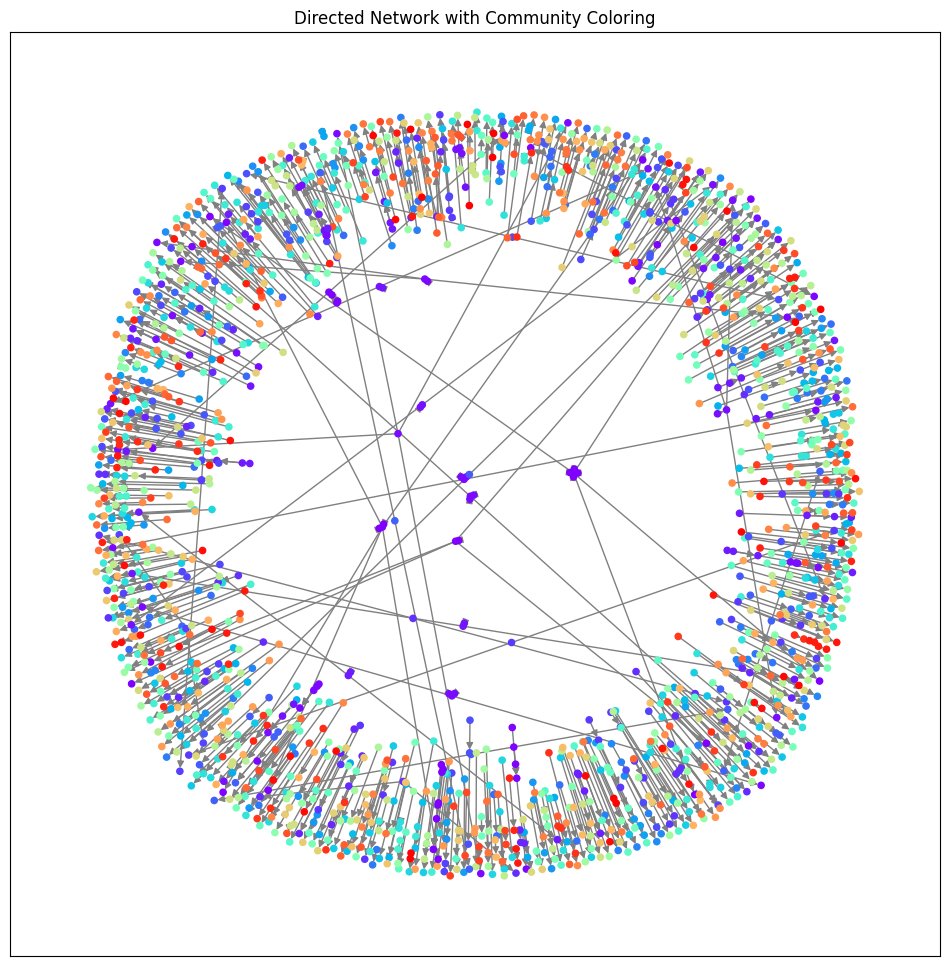

In [24]:
from networkx.algorithms.community import greedy_modularity_communities

# Find communities
communities = greedy_modularity_communities(G)
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Color nodes by community
node_color = [community_map[node] for node in G.nodes()]

plt.figure(figsize=(12, 12))
nx.draw_networkx(G, with_labels=False, node_size=20, node_color=node_color, cmap=plt.cm.rainbow, edge_color='gray', arrows=True)
plt.title('Directed Network with Community Coloring')
plt.show()

## 5. Feature Extraction

**1. Load Data in Chunks or Use Dask:**
* Instead of loading the entire dataset into memory, you can either:

  * Use Dask (a parallel computing library) to handle large data efficiently.
  * Load the dataset in chunks to reduce memory usage.

In [3]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 14.4 MB/s eta 0:00:00


In [2]:
import dask
import dask.dataframe as dd

In [3]:
# Load edges และ nodes ด้วย Dask เพื่อประหยัด
edges = dd.read_csv('/content/drive/MyDrive/Data Engineering/edges.csv', names=['follower', 'followee'])
nodes = dd.read_csv('/content/drive/MyDrive/Data Engineering/nodes.csv', names=['user_id'])

**Dask will handle the data in a distributed fashion, processing parts of it without loading everything into memory at once.**

**2. Compute In-degree (Number of Followers) for each user**

In [4]:
# Load data in chunks
edges_dd = dd.read_csv('/content/drive/MyDrive/Data Engineering/edges.csv', names=['follower', 'followee'])
nodes_dd = dd.read_csv('/content/drive/MyDrive/Data Engineering/nodes.csv', names=['user_id'])

# สร้าง Feature จากการคำนวณ in-degree (จำนวนผู้ติดตาม) โดยใช้ pandas
in_degree_dd = edges_dd.groupby('followee').size().compute()
out_degree_dd = edges_dd.groupby('follower').size().compute()

* Use igraph (NetworkX Alternative)

  * NetworkX is convenient but struggles with memory for very large graphs. You can switch to igraph, which is much more memory efficient for large networks.

In [10]:
!pip install python-igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.8 MB/s eta 0:00:00


In [11]:
import igraph as ig

In [ ]:
# สร้าง igraph graph object จากชุดข้อมูล edges
edges_list = list(edges_dd.compute().itertuples(index=False, name=None))
G = ig.Graph.TupleList(edges_list, directed=True)

# สร้าง Feature จากการคำนวณ in_degree (จำนวนผู้ติดตาม) และ out-degree (จำนวนผู้ที่ถูกติดตาม)
in_degrees = G.degree(mode='in')
out_degrees = G.degree(mode='out')

# แปลง Feature ให้เป็น DataFrame
df = pd.DataFrame({'user_id': range(len(G.vs)), 'in_degree': in_degrees, 'out_degree': out_degrees})

3. Detect Reciprocal Relationships (Reciprocal relationships occur when two users follow each other)
  * ตรวจพบความสัมพันธ์การติดตามซึ่งกันและกัน (reciprocal/mutual relationships)

In [ ]:
# Sort the edges dataset by follower and followee columns
edges_sorted = edges_dd.compute().sort_values(by=['follower', 'followee'])

# Detect reciprocal relationships (iterate through the sorted list)
reciprocal_pairs = edges_sorted.merge(edges_sorted, left_on=['follower', 'followee'],
                                      right_on=['followee', 'follower'])

4. Centrality Using igraph
  * igraph also provides memory-efficient centrality computations for very large graphs.

In [ ]:
# Compute centrality (Eigenvector centrality as an example)
centrality = G.eigenvector_centrality()

# Add the centrality to the DataFrame
df['centrality'] = centrality

5. Combine Everything in a DataFrame:

In [ ]:
# Create final DataFrame
df['user_id'] = [v['name'] for v in G.vs]  # Adding user IDs from igraph
df['in_degree'] = in_degrees
df['out_degree'] = out_degrees
df['centrality'] = centrality

# Add reciprocal relationships
df['reciprocal_relationships'] = df['user_id'].map(reciprocal_pairs['follower'].value_counts()).fillna(0)

**ทำใหม่ใน Kaggle Notebook เพราะ RAM หมด**